# Extracting Tybalt Weights

The weights learned by the Tybalt model indicate patterns of gene expression variably activated across tumors. As Tybalt is an unsupervised model, these weights learned can point to known biology, unknown biology, or unrelated noise. One of the benefits of a variational autoencoder (VAE), is that the weights learned that represent each encoding are  nonlinear. Therefore, they can extract out signal representative of noise while still retaining relevant known and unknown biology.

Here, we extract the weights learned by the VAE and save them to file. We also explore specific signals that should be present in the data:

1. Signals representing the sex of the patient
2. Melanoma activation patterns.

In [1]:
import os
import pandas as pd
from keras.models import load_model

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [0]:
sns.set(style='white', color_codes=True)
sns.set_context('paper', rc={'font.size':8, 'axes.titlesize':10, 'axes.labelsize':15})   

In [0]:
%matplotlib inline
plt.style.use('seaborn-notebook')

Because of the complex architecture involved in encoding the data, we will use the `decoded` weights to describe feature encoding specific activation patterns

In [5]:
!pwd
os.chdir('/content/tybalt')
!pwd


/content/tybalt
/content/tybalt


In [6]:
!ls

adage_training.ipynb	       param_sweep
config			       param_sweep_adage
data			       param_sweep.sh
disease_names.csv	       param_sweep_twohidden
download_data.sh	       param_sweep_twohidden300
environment.yml		       process_data.ipynb
extract_tybalt_weights.ipynb   README.md
figures			       results
gpu-environment.yml	       scripts
hgsc_subtypes_tybalt.ipynb     setup.py
high_weight_genes.ipynb        tsne_tybalt_features.ipynb
latent_space_comparison.ipynb  tybalt
LICENSE.md		       tybalt_twohidden.ipynb
models			       tybalt_vae.ipynb
parameter_sweep.md


In [7]:
!ls tybalt/models

decoder_onehidden_vae_36d.hdf5	encoder_onehidden_vae_36d.hdf5


In [8]:
# Load the decoder model
decoder_model_file = os.path.join('tybalt/models', 'decoder_onehidden_vae_36d.hdf5')
decoder = load_model(decoder_model_file)

/usr/local/lib/python2.7/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
!ls data

background_genes.txt
clinical_data.tsv
encoded_adage_features.tsv
encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv
encoded_rnaseq_onehidden_warmup_batchnorm.tsv
encoded_rnaseq_twohidden_100model.tsv.gz
encoded_rnaseq_twohidden_300model.tsv.gz
gene_reconstruction_fidelity-25dim.tsv
gene_reconstruction_fidelity_36dim.tsv
oncokb_genetypes.tsv
onehidden_warmup_batchnorm_tsne_out.tsv
ov_subtype_info.tsv
pancan_mutation_burden.tsv
pancan_mutation.tsv.gz
pancan_scaled_rnaseq.tsv.gz
pancan_scaled_zeroone_rnaseq.tsv.gz
patient_reconstruction_fidelity-25dim.tsv
patient_reconstruction_fidelity_36dim.tsv
raw
status_matrix.tsv.gz
tcga_colors.tsv
tybalt_features_with_clinical.tsv
tybalt_gene_weights_twohidden100.tsv
tybalt_gene_weights_twohidden300.tsv


In [10]:
# Load RNAseq file
rnaseq_file = os.path.join('data', 'pancan_scaled_zeroone_rnaseq.tsv.gz')
rnaseq_df = pd.read_table(rnaseq_file, index_col=0)
rnaseq_df.head(2)

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.0,0.084731,0.031863,0.037709,0.746797,0.687833,...,0.440610,0.428782,0.732819,0.634340,0.580662,0.294313,0.458134,0.478219,0.168263,0.638497
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.0,0.100606,0.050011,0.092586,0.103725,0.140642,...,0.620658,0.363207,0.592269,0.602755,0.610192,0.374569,0.722420,0.271356,0.160465,0.602560


In [0]:
# For a future pathway analysis, the background genes are important
# Also needed to set column names on weights
background_file = os.path.join('data', 'background_genes.txt')
background_genes = pd.DataFrame(rnaseq_df.columns)
background_genes.to_csv(background_file, index=False, header=False, sep='\t')

## Extract Tybalt weight matrix and write to file

In [12]:
# Extract the weights from the decoder model
weights = []
for layer in decoder.layers:
    weights.append(layer.get_weights())
    
weight_layer_df = pd.DataFrame(weights[1][0], columns=rnaseq_df.columns, index=range(1, 37))
weight_layer_df.index.name = 'encodings'
weight_layer_df.head(2)

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
encodings,,,,,,,,,,,,,,,,,,,,,
1,0.000071,-0.009890,0.102476,0.057907,0.016478,0.066113,0.071145,0.00266,-0.005277,-0.000962,...,0.014247,-0.053174,-0.001406,0.017818,-0.052919,0.019610,0.003947,-0.035366,0.009975,-0.021650
2,0.107572,-0.106271,0.014528,-0.005802,-0.052368,-0.008355,0.030722,-0.04284,0.071156,0.068862,...,-0.039396,-0.016428,-0.030103,-0.020344,-0.007534,0.026374,-0.004658,0.007704,0.017753,-0.010762


In [0]:
# Write the genes to file
weight_file = os.path.join('results', 'tybalt_gene_weights_36d.tsv')
weight_layer_df.to_csv(weight_file, sep='\t')


In [0]:
from google.colab import files
files.download(weight_file)

## Extracting example patterns learned by Tybalt

Focusing on two examples: Sex-specific and tissue-specific activation

### Sex specific activation by node 82

In [22]:
# We previously identified node 82 as robustly separating sex in the data set:
# Visualize the distribution of gene weights here
sex_node_plot = weight_layer_df.loc[[27, 33], :].T
sex_node_plot.columns = ['encoding 27', 'encoding 33']
sex_node_plot = (
    sex_node_plot.reindex(sex_node_plot['encoding 33'].abs()
                          .sort_values(ascending=False).index)
    )
sex_node_plot.head(17)



,encoding 27,encoding 33
EIF1AY,0.268174,-0.271798
DDX3Y,0.261228,-0.263809
CYorf15A,0.250881,-0.263165
UTY,0.257569,-0.252345
USP9Y,0.243606,-0.251203
KDM5D,0.264011,-0.250762
TTTY15,0.223327,-0.243617
RPS4Y1,0.239303,-0.239868
CYorf15B,0.245214,-0.232921
ZFY,0.221822,-0.230547


In [0]:


g = sns.jointplot(x='encoding 0', y='encoding 33',
                  data=sex_node_plot, color='black');
#,
#                  edgecolor="w", stat_func=None);

# Save Figure
sex_node_plot_file = os.path.join('figures', 'encoding_27_33_scatter.pdf')
g.savefig(sex_node_plot_file)

In [0]:
# There are 17 genes with high activation in node 82
# All genes are located on sex chromosomes
sex_node_plot.head(17)

,encoding 82,encoding 85
EIF1AY,-0.543605,0.013644
UTY,-0.514367,0.019198
CYorf15A,-0.514013,0.016753
KDM5D,-0.499488,0.019061
DDX3Y,-0.497709,0.022053
TMSB4Y,-0.495302,-0.003714
USP9Y,-0.494874,0.022164
TTTY15,-0.487078,0.014047
NCRNA00185,-0.473645,-0.019878
CYorf15B,-0.472546,0.019967


By measuring expression of only *17 genes*, we can reliably predict the sex of the cancer patient. These are genes most expressed by sex chromosomes including x inactivating genes _XIST_ and _TSIX_.

### Node separating melanoma samples

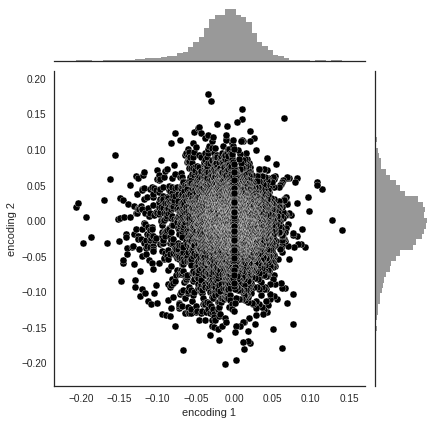

In [0]:
# We previously observed metastasis samples being robustly separated by two features
# Visualize the feature scores here
met_node_plot = weight_layer_df.loc[[2, 4], :].T
met_node_plot.columns = ['encoding 1', 'encoding 2']

met_node_plot = (met_node_plot.reindex(met_node_plot['encoding 1'].abs()
                                       .sort_values(ascending=False).index)
                 )
g = sns.jointplot(x='encoding 1', y='encoding 2',
                  data=met_node_plot, color='black',
                  edgecolor="w", stat_func=None);

# Save outputs
met_node_plot_file = os.path.join('figures', 'skcm_metastasis_node_gene_scatter.pdf')
g.savefig(met_node_plot_file)

#### Output high weight genes for two specific SKCM encodings

Because the genes involved in these nodes are not as cut and dry as the sex specific nodes, output the high weight genes explaining each tail of node 53 and 66. These will be processed though a pathway analysis downstream.

In [0]:
def output_high_weight_genes(weight_df, encoding, filename, thresh=2.5):
    """
    Function to process and output high weight genes given specific feature encodings
    """
    
    # Sort initial encoding by absolute activation
    encoding_df = (
        weight_df
        .reindex(weight_df[encoding].abs()
                 .sort_values(ascending=False).index)[encoding]
    )
    
    hw_pos_df = pd.DataFrame(encoding_df[encoding_df > encoding_df.std() * thresh])
    hw_pos_df = hw_pos_df.assign(direction='positive')
    hw_neg_df = pd.DataFrame(encoding_df[encoding_df < -encoding_df.std() * thresh])
    hw_neg_df = hw_neg_df.assign(direction='negative')
    
    hw_df = pd.concat([hw_pos_df, hw_neg_df])
    hw_df.index.name = 'genes'
    hw_df.to_csv(filename, sep='\t')
    return hw_df

In [0]:
# Encoding 1
hw_node1_file = os.path.join('results', 'high_weight_genes_node1_skcm.tsv')
node1_df = output_high_weight_genes(met_node_plot, 'encoding 1', hw_node1_file)
node1_df.head(100)

,encoding 1,direction
genes,,
LOC100271831,0.140773,positive
ZNHIT2,0.127473,positive
NCRNA00185,0.114999,positive
EIF1AY,0.108022,positive
RPS4Y1,0.107572,positive
SYNC,0.098237,positive
CLVS1,0.096630,positive
SYCE1L,0.093018,positive
SNORD116-4,-0.205755,negative


In [0]:
# Encoding 53
hw_node53_file = os.path.join('results', 'high_weight_genes_node53_skcm.tsv')
node53_df = output_high_weight_genes(met_node_plot, 'encoding 53', hw_node53_file)
node53_df.head(5)

,encoding 53,direction
genes,,
HCG22,0.084451,positive
RXRG,0.081329,positive
MGAT4C,0.076966,positive
PLP1,0.076440,positive
C10orf90,0.076005,positive
